# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490'

In [20]:
# Create empty lists with urls
urls = []

# Appending all the urls to a list
for city in cities:
    urls.append(f"{url}&q={city}")

urls

['http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=taolanaro',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=guaymas',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=bubaque',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=tabuk',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=soyo',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=puerto ayora',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=rikitea',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b5adb915b09fef11ff8b63701e490&q=east london',
 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f96b

In [21]:
# How many elements each 
# list should have 
n = 50

# We create a list of lists with chunks of n = 50 urls
urls_in_chunks = [urls[i * n:(i + 1) * n] for i in range((len(urls) + n - 1) // n )]

# Printing the number of sets of n = 50 urls
print (len(urls_in_chunks)) 

13


In [23]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

set = 1
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for urls in urls_in_chunks:
    for cities in urls:
        # Try statement to append calls where value is found 
        # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
        try: 
            response = requests.get(f"{cities}").json() 
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            max_temp.append(response["main"]["temp_max"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            
            
            print(f"Processing Record {record} of Set {set} | {city_record}")

            # Increase counter by one 
            record= record + 1
            
        # If no record found "skip" to next call
        except:
            print("City not found. Skipping...")
            # Increase counter by one 
            record= record + 1
        continue
    set = set + 1
    record = 1

print(f"-------------------------------")
print(f"Data Retrieval Complete ")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 2 of Set 1 | Guaymas
Processing Record 3 of Set 1 | Bubaque
Processing Record 4 of Set 1 | Tabuk
Processing Record 5 of Set 1 | Soyo
Processing Record 6 of Set 1 | Puerto Ayora
Processing Record 7 of Set 1 | Rikitea
Processing Record 8 of Set 1 | East London
Processing Record 9 of Set 1 | Busselton
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 1 | Tomatlan
Processing Record 14 of Set 1 | Khatanga
Processing Record 15 of Set 1 | Lensk
Processing Record 16 of Set 1 | Tuktoyaktuk
Processing Record 17 of Set 1 | Vryburg
Processing Record 18 of Set 1 | Yellowknife
Processing Record 19 of Set 1 | Vanino
Processing Record 20 of Set 1 | Ushuaia
Processing Record 21 of Set 1 | Ixtapa
Processing Record 22 of Set 1 | Arraial do Cabo
Processing Record 23 of Set 1 | Necochea
Processing Record 24 of Set 1 | Klaksvik
Processing Record

Processing Record 7 of Set 5 | Kahului
Processing Record 8 of Set 5 | Chuy
City not found. Skipping...
Processing Record 10 of Set 5 | Port Alfred
Processing Record 11 of Set 5 | Bosobolo
Processing Record 12 of Set 5 | Abu Dhabi
City not found. Skipping...
Processing Record 14 of Set 5 | Barentu
Processing Record 15 of Set 5 | Mount Hagen
Processing Record 16 of Set 5 | Cockburn Town
Processing Record 17 of Set 5 | Batagay-Alyta
Processing Record 18 of Set 5 | Tottori
Processing Record 19 of Set 5 | Upernavik
Processing Record 20 of Set 5 | Vila Franca do Campo
Processing Record 21 of Set 5 | Grindavik
Processing Record 22 of Set 5 | Shubarkuduk
Processing Record 23 of Set 5 | Leh
Processing Record 24 of Set 5 | Aleksandrov Gay
Processing Record 25 of Set 5 | Ghanzi
Processing Record 26 of Set 5 | Nanortalik
Processing Record 27 of Set 5 | Sovetskiy
Processing Record 28 of Set 5 | Emmett
Processing Record 29 of Set 5 | Tobol
Processing Record 30 of Set 5 | Samon
Processing Record 31 o

Processing Record 11 of Set 9 | Yerofey Pavlovich
Processing Record 12 of Set 9 | Lavrentiya
Processing Record 13 of Set 9 | Arcachon
Processing Record 14 of Set 9 | Bathsheba
Processing Record 15 of Set 9 | Brus Laguna
Processing Record 16 of Set 9 | Juneau
Processing Record 17 of Set 9 | Prieska
Processing Record 18 of Set 9 | Faanui
Processing Record 19 of Set 9 | Farad
Processing Record 20 of Set 9 | Uberlandia
Processing Record 21 of Set 9 | Akdepe
Processing Record 22 of Set 9 | Rawa Mazowiecka
City not found. Skipping...
Processing Record 24 of Set 9 | Thaba-Tseka
Processing Record 25 of Set 9 | Cartagena
Processing Record 26 of Set 9 | Fushun
Processing Record 27 of Set 9 | Vilyuysk
Processing Record 28 of Set 9 | Westport
Processing Record 29 of Set 9 | Fairview
Processing Record 30 of Set 9 | Iwade
Processing Record 31 of Set 9 | Kamenka
Processing Record 32 of Set 9 | Berdigestyakh
Processing Record 33 of Set 9 | Troitsko-Pechorsk
City not found. Skipping...
City not found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [25]:
# Save data frame to CSV
weather_data.to_csv(output_data_file)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Guaymas,100,MX,1563616125,73,27.92,-110.90,82.00,5.01
1,Bubaque,100,GW,1563616126,80,11.28,-15.83,78.10,7.96
2,Tabuk,100,PH,1563616126,98,17.41,121.44,69.82,2.80
3,Soyo,40,AO,1563616094,74,-6.13,12.37,78.80,4.61
4,Puerto Ayora,5,EC,1563616126,87,-0.74,-90.35,66.40,5.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

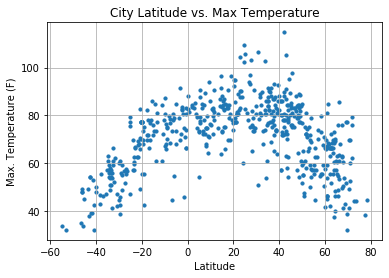

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

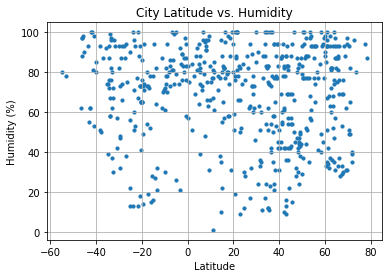

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

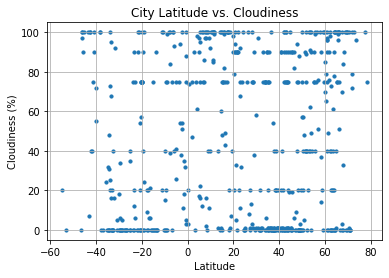

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

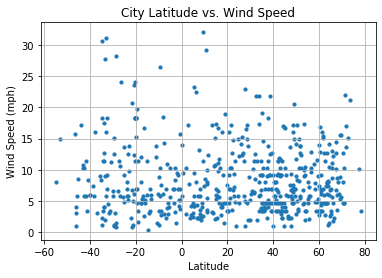

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()